In [251]:
import pandas as pd
import hvplot.pandas
from datetime import datetime
import matplotlib.pyplot as plt

In [252]:
# Plotting a line chart for increase in housing prices

# Reading data and creating a DataFrame
housing_file = "./Resources/housing_data.csv"
housing_df = pd.read_csv(housing_file)
housing_df["Date"] = pd.to_datetime(housing_df["Date"])

# Creates a new column in the CSV file for year
housing_df["Year"] = housing_df["Date"].dt.year

# Groups housing data by year
yearly_housing_data = housing_df.groupby("Year").mean()
# yearly_housing_data = yearly_housing_data.drop(columns=["Unnamed: 0", "Composite_HPI_SA", "Single_Family_HPI_SA", "One_Storey_HPI_SA", "Two_Storey_HPI_SA", "Townhouse_HPI_SA", "Apartment_HPI_SA", "Composite_Benchmark_SA", "One_Storey_Benchmark_SA", "Two_Storey_Benchmark_SA", "Townhouse_Benchmark_SA", "Apartment_Benchmark_SA"])

yearly_housing_data.head()


,Unnamed: 0,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Average House Price,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
Year,,,,,,,,,,,,,
2005,5.5,105.258333,105.566667,104.700000,105.408333,102.916667,105.041667,232833.333333,247766.666667,203308.333333,288608.333333,210291.666667,180375.000000
2006,17.5,122.891667,123.816667,122.700000,122.283333,117.925000,121.450000,271816.666667,290608.333333,238300.000000,334783.333333,240925.000000,208525.000000
2007,29.5,140.775000,142.575000,143.008333,138.641667,133.100000,137.475000,311383.333333,334616.666667,277741.666667,379600.000000,271933.333333,236033.333333
2008,41.5,145.466667,147.508333,147.916667,142.916667,137.441667,142.266667,321750.000000,346216.666667,287258.333333,391308.333333,280775.000000,244291.666667
2009,53.5,141.333333,143.533333,141.950000,139.716667,132.191667,138.325000,312641.666667,336850.000000,275675.000000,382575.000000,270058.333333,237508.333333


In [253]:
# Divides the data by 1,000,000
yearly_housing_data["Average House Price"] = yearly_housing_data["Average House Price"].div(1000000).round(2)
# Plots a line chart for the data
yearly_housing_data.hvplot(x='Year', y="Average House Price", rot=90, color="green", width=1200, height = 500, title="Average Prices of Single Family Homes In Canada From 2005-2022 In Millions")

:Curve   [Year]   (Average House Price)

In [254]:
# Creating a line chart comparing inflation and interest rates

# Reading infation data and creating a DataFrame
inflation_file = "./Resources/inflation_data.csv"
inflation_df = pd.read_csv(inflation_file, parse_dates=True, infer_datetime_format=True, index_col="Date")
inflation_df = inflation_df.drop(["Simple Growth Rate %", "Y-o-Y Change %", "Annual % Rate", "Type"], axis=1)

# Reading interest rate file and creating a DataFrame
interest_file = "./Resources/interest_rates.csv"
interest_df = pd.read_csv(interest_file, index_col="Date")
interest_df = interest_df.sort_index(ascending=False)

# Combining the inflation DataFrames together
combined_df = pd.concat([inflation_df, interest_df], join="outer", axis="columns")
combined_df = combined_df.dropna()
combined_df = combined_df.reset_index()

# Creates a new column in the CSV file for year
combined_df["Date"] = pd.to_datetime(combined_df["Date"])
combined_df["Year"] = combined_df["Date"].dt.year

# Groups housing data by year
yearly_combined_df = combined_df.groupby("Year").mean()

yearly_combined_df.head()

,Inflation Rate,Prime Rate
Year,,
1979,9.77,13.500000
1980,9.63,15.091667
1981,12.35,20.000000
1982,11.91,17.100000
1983,6.93,11.500000


In [255]:
# Plots a line chart comparing the data
yearly_combined_df.hvplot(x='Year', y=['Inflation Rate', 'Prime Rate'], value_label='Inflation Rate/Prime Rate', rot=90, width=1200, height = 700, title="Inflation Rates Compared to Prime Rates in Canada From 1979 to 2022")

:NdOverlay   [Variable]
   :Curve   [Year]   (Inflation Rate/Prime Rate)

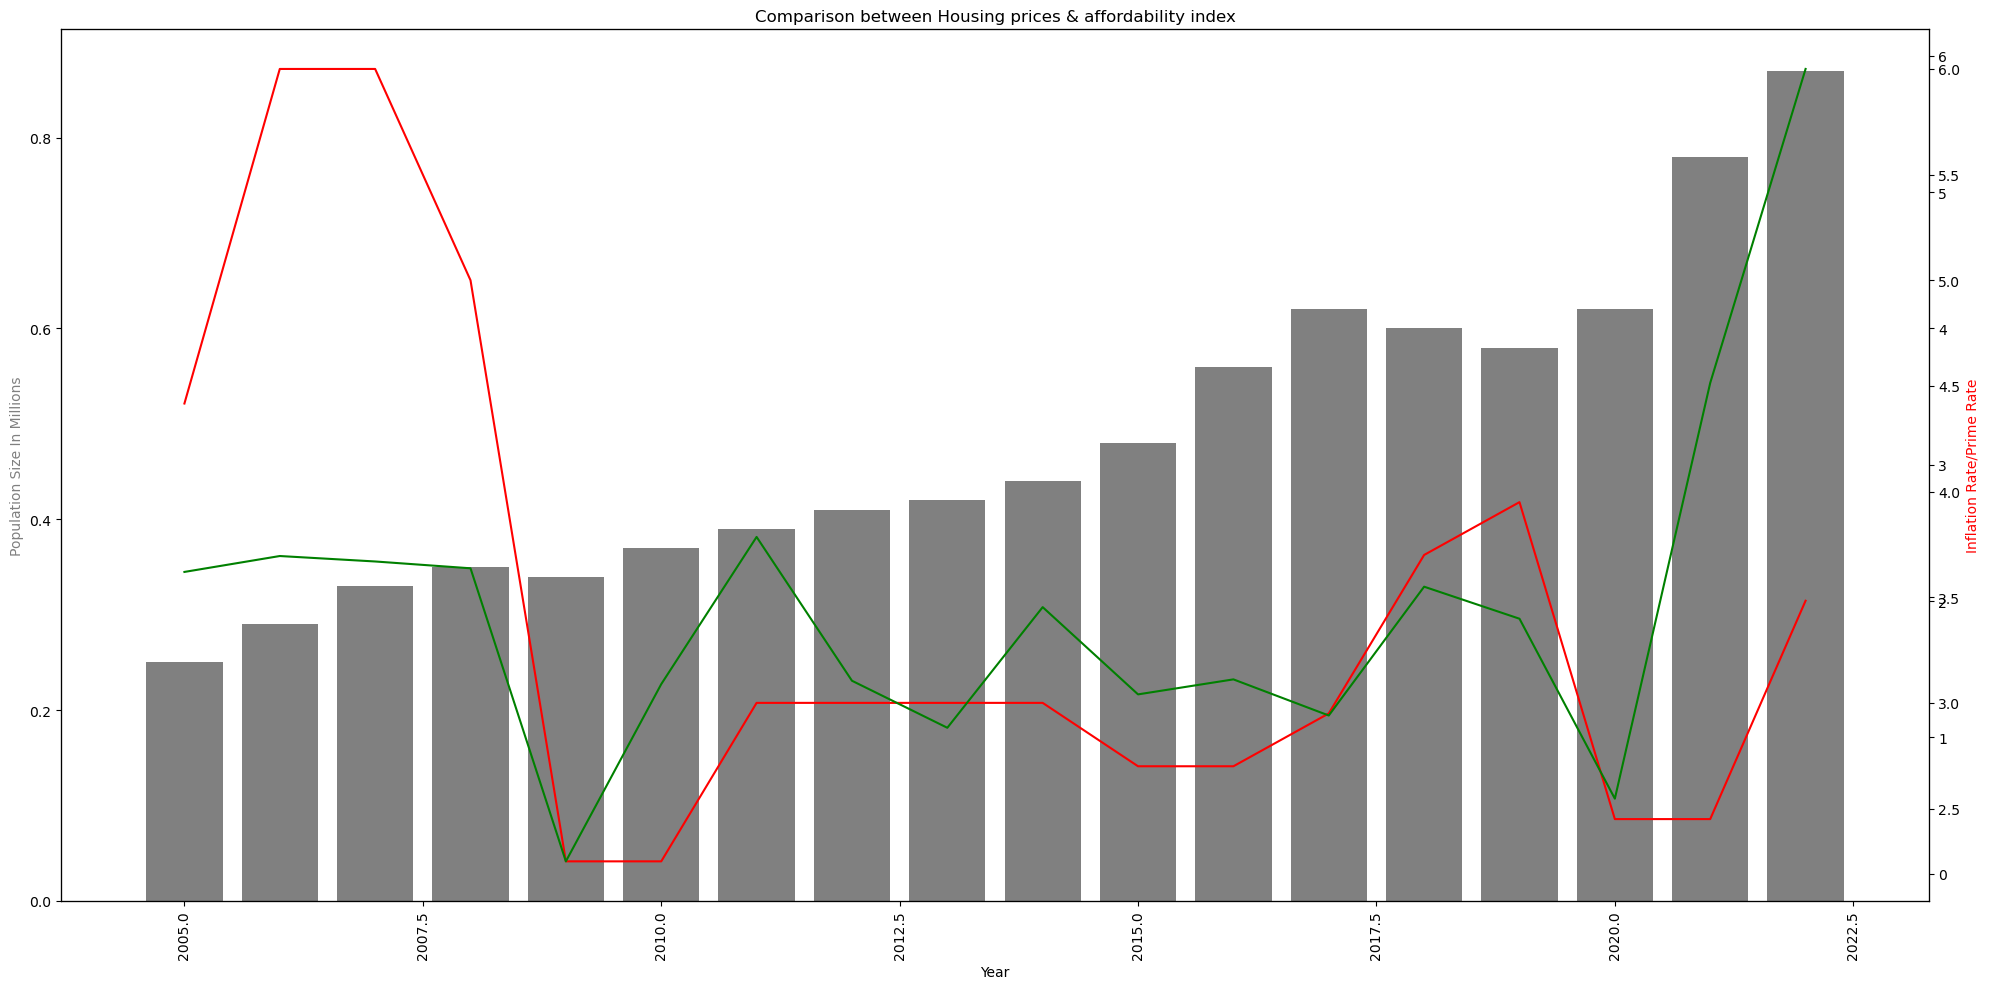

In [256]:
# Concatenate the inflation and interest data with the housing data

housing_inflation_df = pd.concat([yearly_combined_df, yearly_housing_data], join="outer", axis="columns")
housing_inflation_df.dropna(inplace=True)
housing_inflation_df = housing_inflation_df.reset_index()
housing_inflation_df

# Sets variables for the plot
x = housing_inflation_df["Year"]
y1 = housing_inflation_df["Average House Price"]
y2 = housing_inflation_df["Prime Rate"]
y3 = housing_inflation_df["Inflation Rate"]

# using subplots() function
fig, ax = plt.subplots(figsize = (20, 10))
plt.title('Comparison between Housing prices & affordability index')
# set xticks rotation before creating ax2
plt.xticks(rotation=90)
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax3 = ax.twinx()
ax.bar(x, y1, color = 'gray')
ax2.plot(x, y2, color = 'red')
ax3.plot(x, y3, color = 'green')
# giving labels to the axises
ax.set_xlabel('Year', color = 'black')
ax.set_ylabel('Population Size In Millions', color = 'gray')

# secondary y-axis label

ax2.set_ylabel('Inflation Rate/Prime Rate', color = 'red')
plt.tight_layout()
plt.show()

In [257]:
# Creating a bar chart for population growth

# Reading the population data file and creating a DataFrame
population_file = "./Resources/population_growth.csv"
population_df = pd.read_csv(population_file)

# Divides the data by 1,000,000
population_df["Population"] = population_df["Population"].div(1000000).round(2)

population_df = population_df.drop(columns=["Country", "DGUID", "Sex", "Age group", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])

# Plotting the data on a bar chart
population_df.hvplot.bar(x='Year', rot=90, y='Population', color="green", width=1200, height=500, title="Population Growth in Canada from 2000 to 2022 In Millions")

:Bars   [Year]   (Population)

In [258]:
# Creating a bar chart for the number of immigrants moving to canada per year

# Reading the files and creating a DataFrame
immigration_file = "./Resources/immigration_data.csv"
immigration_df = pd.read_csv(immigration_file)

# Creates a new column in the CSV file for year
immigration_df["Date"] = pd.to_datetime(immigration_df["Date"])
immigration_df["Year"] = immigration_df["Date"].dt.year

immigration_df = immigration_df.drop(columns=["Date", "GEO", "DGUID", "Components of population growth", "UOM", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])


# Grouping yearly immigration data
yearly_immigration_df = immigration_df.groupby("Year").mean()

# Divides the data by 1000
yearly_immigration_df["Number of Immigrants"] = yearly_immigration_df["Number of Immigrants"].div(1000).round(2)

# Plots the data on a bar chart
yearly_immigration_df.hvplot.bar(x='Year', y='Number of Immigrants', rot=90, width=1200, height = 500, title="Amount of Immigrants Per Year In Canada From 2000-2022 In Thousands")

:Bars   [Year]   (Number of Immigrants)

In [259]:
# Concatenates the population and immigration data
population_immigration_df = pd.concat([population_df, immigration_df], join="outer", axis="columns")
population_immigration_df = population_immigration_df.reset_index()
population_immigration_df = population_immigration_df.drop_duplicates(subset=['Population'])
population_immigration_df


,index,Year,Population,Number of Immigrants,Year
0,0,2000.0,30.69,45564,2000
1,1,2001.0,31.02,57871,2000
2,2,2002.0,31.36,66518,2000
3,3,2003.0,31.64,57476,2000
4,4,2004.0,31.94,58485,2001
5,5,2005.0,32.24,70048,2001
6,6,2006.0,32.57,69951,2001
7,7,2007.0,32.89,52154,2001
8,8,2008.0,33.25,61589,2002
9,9,2009.0,33.63,72711,2002


ValueError: shape mismatch: objects cannot be broadcast to a single shape

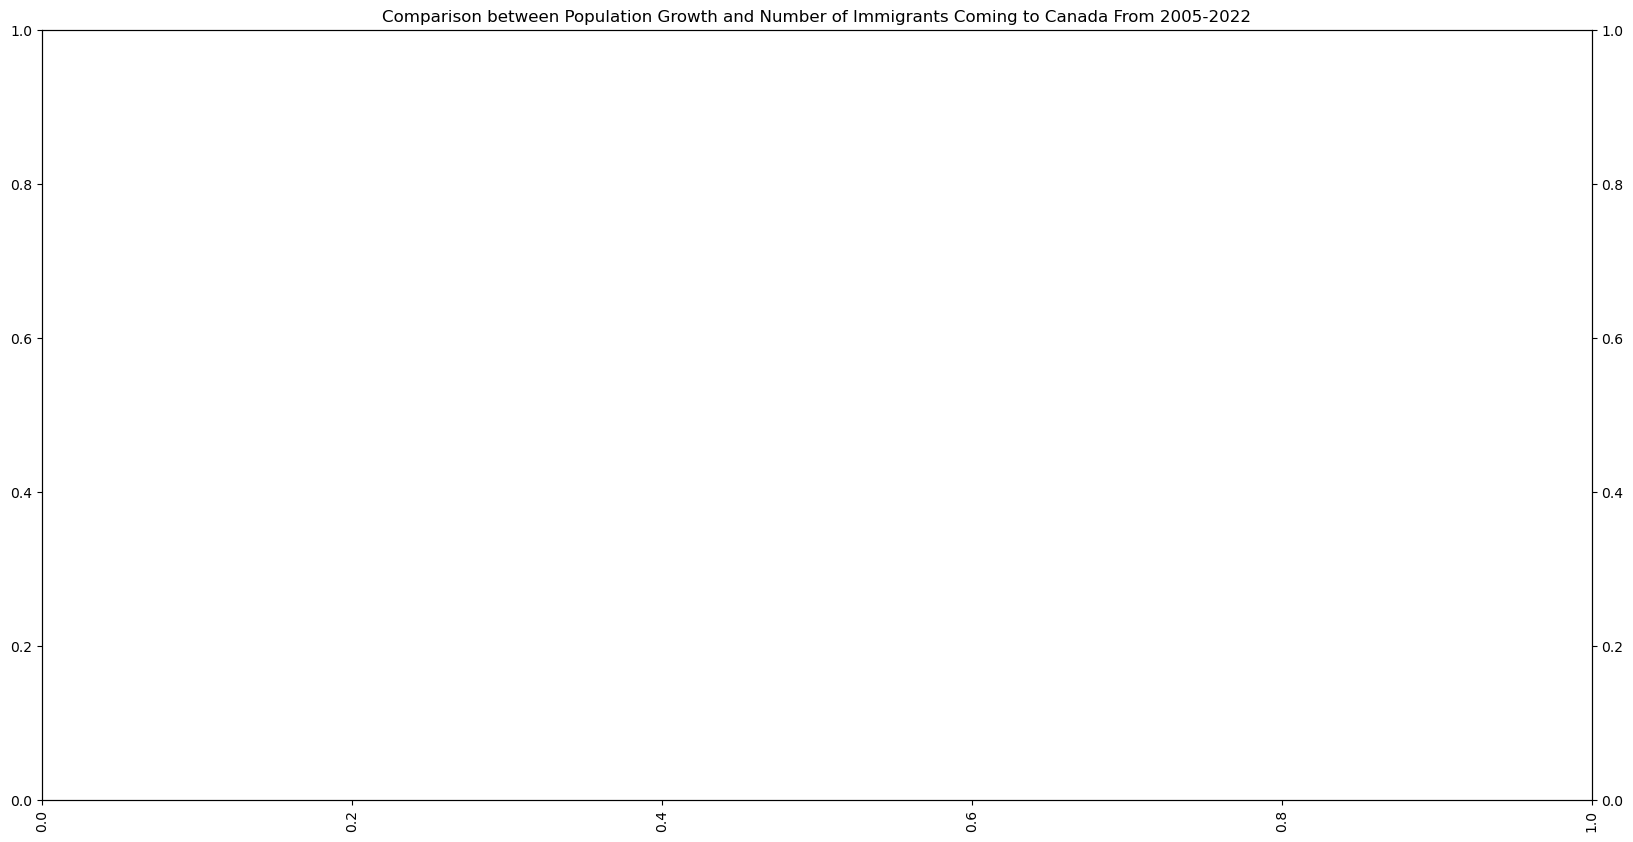

In [260]:
# Set variables for the plot
x = population_immigration_df["Year"]
y1 = population_immigration_df["Population"]
y2 = population_immigration_df["Number of Immigrants"]


# # using subplots() function
fig, ax = plt.subplots(figsize = (20, 10))
plt.title('Comparison between Population Growth and Number of Immigrants Coming to Canada From 2005-2022')
# # set xticks rotation before creating ax2
plt.xticks(rotation=90)
# # using the twinx() for creating another
# # axes object for secondary y-Axis
# # labels = ["Housing Prices In Millions", "Prime Rate", "Inflation Rate"]
ax2 = ax.twinx()

ax.bar(x, y1, color = '#5ADBFF', label="Population Size")
ax2.plot(x, y2, color = '#094074', label="Number of Immigrants")
# # giving labels to the axises
ax.set_xlabel('Year', color = 'black')
ax.set_ylabel('Population Size In Millions', color = '#5ADBFF')

# # secondary y-axis label

ax2.set_ylabel('Number of Immigrants', color = '#094074')
plt.tight_layout()
plt.show()
